<a href="https://colab.research.google.com/github/michalszczecinski/data-driven-notebooks/blob/master/dev/templates/knowledge_notebook_minimal_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The deterministic nature of random events

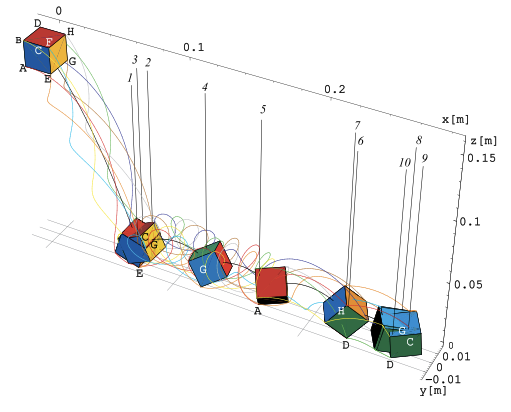


1. This notebook is about philosophy differentiating Bayesian Statistics.


In [73]:
# imports
import numpy as np
import pandas as pd
import math
import unittest 

import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
def add_totals(df):
    df_totals = df.copy(deep=True)
    totals_columns = df_totals.sum(axis=0)
    totals_columns.name = 'totals_columns'
    totals_columns
    df_totals['total_rows'] = df_totals.sum(axis=1)
    df_totals.loc['total_columns',:] = df_totals.sum(axis=0)
    return df_totals


## Philosophy - Bayesian vs Frequentist

### Parameters vs data

Which of the following views you prefer comes down to how you interpret the parameters of a statistical model. 

1. For Bayesians, the parameters of the system are taken to vary, whereas the known part of the system - `the data` is taken as given. 
2. Frequentist statisticians, on the other hand, view the unseen part of the system – `the parameters of the probability model` as being fixed and the known parts of the system `the data` as varying. 

In the Bayesian approach, parameters can be viewed from two perspectives. The fact that we obtain different estimates of parameters from different studies can be taken to reflect either of these two views.

1. Either we view the parameters as truly varying. 
2. Or we view our knowledge about the parameters as imperfect. 

In the first case, we understand the parameters of interest as varying – taking on different values in each of the samples we pick (see the top panel of Figure 2.2). For example, suppose that we conduct a blood test on an individual in two consecutive weeks, and represent the correlation between the red and white cell count as a parameter of our statistical model. Due to the many factors that affect the body’s metabolism, the count of each cell type will vary somewhat randomly, and hence the parameter value may vary over time.

In the second case, we view our uncertainty over a parameter’s value as the reason we estimate slightly different values in different samples. This uncertainty should, however, decrease as we collect more data (see the middle panel of Figure 2.2). 

### Limitations of constants representing average of a long run infinite number of identical experiments

Bayesians are more at ease in using parameters as a means to an end – taking them not as real immutable constants, but as tools to help make inferences about a given situation. The Frequentist perspective is less flexible and assumes that these parameters are constant, or represent the average of a long run – typically an infinite number – of identical experiments.

There are occasions when we might think that this is a reasonable assumption. For example, if our parameter represented the probability that an individual taken at random from the UK population has dyslexia, it is reasonable to assume that there is a true, or fixed, population value of the parameter in question. While the Frequentist view may be reasonable here, the Bayesian view can also handle this situation. In Bayesian statistics these parameters can be assumed fixed, but that we are uncertain of their value (here the true prevalence of dyslexia) before we measure them, and use a probability distribution to reflect this uncertainty. But there are circumstances when the Frequentist view runs into trouble. When we are estimating parameters of a complex distribution, we typically do not view them as actually existing.

Unless you view the Universe as being built from mathematical building blocks, then it seems incorrect to assert that a given parameter has any deeper existence than that with which we endow it. The less restrictive Bayesian perspective here seems more reasonable. See [4] for an interesting argument for this hypothesis. The Frequentist view of parameters as a limiting value of an average across an infinity of identically repeated experiments also runs into difficulty when we think about one-off events. For example, the probability that the Democrat candidate wins in the 2020 US election cannot be justified in this way, since elections are never rerun under the exact same conditions. 

## Problem: What is the probability that the coin lands heads up?

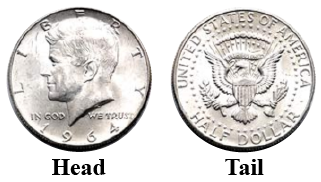

image source: https://www.cuemath.com/data/tossing-a-coin/

Suppose that, in an idealised world, the ultimate fate of a thrown coin heads or tails is deterministically given by the angle at which you throw the coin and its height above a table. Also in this ideal world, the heights and angles are discrete. However, the system is chaotic (highly sensitive
to initial conditions), and the results of throwing a coin at a given angle and height are shown in the table below.

### Problem 2.1.1. 

Suppose that all combinations of angles and heights are equally likely to be
chosen. What is the probability that the coin lands heads up?

In [74]:
# table 2.1
heights = [0.2, 0.4, 0.6, 0.8, 1]
angle_degrees = [0, 45, 90, 135, 180, 225, 270, 315]

data = [['T', 'H', 'T', 'T', 'H'],
        ['H', 'T', 'T', 'T', 'T'],
        ['H', 'H', 'T', 'T', 'H'],
        ['H', 'H', 'T', 'H', 'T'],
        ['H', 'H', 'T', 'H', 'H'],
        ['H', 'T', 'H', 'T', 'T'],
        ['H', 'T', 'T', 'T', 'H'],
        ['T', 'H', 'H', 'T', 'T']]

df_data = pd.DataFrame(data, columns=heights, index=angle_degrees)
df_data.index.name = 'angle_degrees'
df_data.columns.name = 'heights'
df_data

heights,0.2,0.4,0.6,0.8,1.0
angle_degrees,,,,,
0,T,H,T,T,H
45,H,T,T,T,T
90,H,H,T,T,H
135,H,H,T,H,T
180,H,H,T,H,H
225,H,T,H,T,T
270,H,T,T,T,H
315,T,H,H,T,T


In [75]:
size_of_data = df_data.size
size_of_data

40

In [76]:
# lets replace Heads with 1s and Tails with 0s
df = df_data.isin(['H']).astype(int)
df

heights,0.2,0.4,0.6,0.8,1.0
angle_degrees,,,,,
0,0,1,0,0,1
45,1,0,0,0,0
90,1,1,0,0,1
135,1,1,0,1,0
180,1,1,0,1,1
225,1,0,1,0,0
270,1,0,0,0,1
315,0,1,1,0,0


In [32]:
df_totals = add_totals(df)
df_totals

heights,0.2,0.4,0.6,0.8,1.0,total_rows
angle_degrees,,,,,,
0,0.0,1.0,0.0,0.0,1.0,2.0
45,1.0,0.0,0.0,0.0,0.0,1.0
90,1.0,1.0,0.0,0.0,1.0,3.0
135,1.0,1.0,0.0,1.0,0.0,3.0
180,1.0,1.0,0.0,1.0,1.0,4.0
225,1.0,0.0,1.0,0.0,0.0,2.0
270,1.0,0.0,0.0,0.0,1.0,2.0
315,0.0,1.0,1.0,0.0,0.0,2.0
total_columns,6.0,5.0,2.0,2.0,4.0,19.0


### Solution

In [78]:
df_probabilities = df_totals / size_of_data
df_probabilities

heights,0.2,0.4,0.6,0.8,1.0,total_rows
angle_degrees,,,,,,
0,0.000,0.025,0.000,0.000,0.025,0.050
45,0.025,0.000,0.000,0.000,0.000,0.025
90,0.025,0.025,0.000,0.000,0.025,0.075
135,0.025,0.025,0.000,0.025,0.000,0.075
180,0.025,0.025,0.000,0.025,0.025,0.100
225,0.025,0.000,0.025,0.000,0.000,0.050
270,0.025,0.000,0.000,0.000,0.025,0.050
315,0.000,0.025,0.025,0.000,0.000,0.050
total_columns,0.150,0.125,0.050,0.050,0.100,0.475


In [79]:
probability_of_heads = df_probabilities.loc['total_columns', 'total_rows']
probability_of_heads

0.475

Answer: We can count the occurrence of heads and tails in Table 2.1, and find that $Pr(H) = \frac{19}{40}$. This is the probability that the coin lands heads up.

### Problem 2.1.2. 

Now suppose that some combinations of angles and heights are more likely to be
chosen than others, with the probabilities shown in Table 2.2. What are the new probabilities that
the coin lands heads up?

In [80]:
# table 2.2
# from https://benlambertdotcom.files.wordpress.com/2019/03/bayesianbook_problemsanswers_including_errata.pdf
s = """
0.05 0.03 0.02 0.04 0.04
0.03 0.02 0.01 0.05 0.02
0.05 0.03 0.01 0.03 0.02
0.02 0.03 0.04 0.00 0.04
0.03 0.02 0.02 0.00 0.03
0.00 0.01 0.04 0.03 0.02
0.03 0.00 0.03 0.01 0.04
0.02 0.03 0.03 0.02 0.01
"""

# process data into a list of lists for the input to dataframe
l = []
for x in s.split('\n'):
    l.append(([float(y) for y in x.split(' ') if y]))
data = [x for x in l if x]

# create dataframe
df_frequencies = pd.DataFrame(data, columns=heights, index=angle_degrees)
df_frequencies.index.name = 'angle_degrees'
df_frequencies.columns.name = 'heights'
df_frequencies

heights,0.2,0.4,0.6,0.8,1.0
angle_degrees,,,,,
0,0.05,0.03,0.02,0.04,0.04
45,0.03,0.02,0.01,0.05,0.02
90,0.05,0.03,0.01,0.03,0.02
135,0.02,0.03,0.04,0.00,0.04
180,0.03,0.02,0.02,0.00,0.03
225,0.00,0.01,0.04,0.03,0.02
270,0.03,0.00,0.03,0.01,0.04
315,0.02,0.03,0.03,0.02,0.01


In [82]:
#TODO add function for adding subtotals taking input dataframe and returning new dataframe with total row and column
df_prob = df * df_frequencies
df_prob

heights,0.2,0.4,0.6,0.8,1.0
angle_degrees,,,,,
0,0.00,0.03,0.00,0.0,0.04
45,0.03,0.00,0.00,0.0,0.00
90,0.05,0.03,0.00,0.0,0.02
135,0.02,0.03,0.00,0.0,0.00
180,0.03,0.02,0.00,0.0,0.03
225,0.00,0.00,0.04,0.0,0.00
270,0.03,0.00,0.00,0.0,0.04
315,0.00,0.03,0.03,0.0,0.00


In [83]:
add_totals(df_prob)

heights,0.2,0.4,0.6,0.8,1.0,total_rows
angle_degrees,,,,,,
0,0.00,0.03,0.00,0.0,0.04,0.07
45,0.03,0.00,0.00,0.0,0.00,0.03
90,0.05,0.03,0.00,0.0,0.02,0.10
135,0.02,0.03,0.00,0.0,0.00,0.05
180,0.03,0.02,0.00,0.0,0.03,0.08
225,0.00,0.00,0.04,0.0,0.00,0.04
270,0.03,0.00,0.00,0.0,0.04,0.07
315,0.00,0.03,0.03,0.0,0.00,0.06
total_columns,0.16,0.14,0.07,0.0,0.13,0.50


Answer: We must now find a weighted average of the coin flip outcomes where the weights are provided by the values in Table 2.2. If we do so we find that Pr(H) = 0.5.

## References

[1] [A Student’s Guide to Bayesian Statistics, Ben Lambert](https://study.sagepub.com/lambert)

[2] [Our Mathematical Universe: My Quest for the Ultimate Nature of Reality](https://en.wikipedia.org/wiki/Our_Mathematical_Universe)

[3] [AI Feynman: A physics-inspired method for symbolic regression](https://www.science.org/doi/10.1126/sciadv.aay2631)

[4] [The three-dimensional dynamics of the die throw](http://kapitaniak.kdm.p.lodz.pl/papers/2012/Kapitaniak_Strzalko_Grabski_Kapitaniak.pdf)